In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Checking our Results

In this notebook we will try to see how the distances we obtained look like on the map of the FUA.

## 1. Getting the files

Known issue: the OD matrices have two extra columns (unnamed 0 and unnamed 0.1) due to droping indices while saving along the way. i will fix this later but for now we can just drop the columns as we load the matrices

In [10]:
def get_files(fua_code):
    
    buffered_boundary = gpd.read_file('../data/d03_intermediate/FUA-buffered-shapefile/FUA-buffered.shp').set_index('fuacode').loc[[fua_code]]
    walk_graph = ox.load_graphml('../data/d03_intermediate/FUA-networks/walk/'+fua_code+'.graphml')
    drive_graph = ox.load_graphml('../data/d03_intermediate/FUA-networks/drive/'+fua_code+'.graphml')
    OD_matrix = pd.read_csv('../data/d04_final-OD-matrices/final-OD-per-FUA/'+fua_code+'_final-ODmatrix.csv').drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
    
    return buffered_boundary, walk_graph, drive_graph, OD_matrix

 We will use two functional urban areas as example: FUA80 and FUA81.

In [11]:
buffered_boundary_80, walk_graph_80, drive_graph_80, OD_matrix_80 = get_files('USA80')
buffered_boundary_81, walk_graph_81, drive_graph_81, OD_matrix_81 = get_files('USA81')

These OD matrices will have columns telling us whether the commute was made by walking or driving (note that we concatatenated the datafames of walking and driving vertically so that all the driving come first), columns with the OSMid of the closest node in the correponding network, and the distance in meters

In [12]:
OD_matrix_80.head()

,safegraph_place_id,census_block_group,top_category,latitude,longitude,fuacode,intptlat,intptlon,walk,origin_node,destination_node,distance
0,sg:001855be013b421688f5f8c2e724d076,550250114021,Restaurants and Other Eating Places,43.172181,-89.265802,USA80,43.126509,-89.271130,False,3825890239,1684819350,6421.298
1,sg:001855be013b421688f5f8c2e724d076,550250022003,Restaurants and Other Eating Places,43.172181,-89.265802,USA80,43.120499,-89.366947,False,53638087,1684819350,12627.421
2,sg:001855be013b421688f5f8c2e724d076,550250115032,Restaurants and Other Eating Places,43.172181,-89.265802,USA80,43.201220,-89.244345,False,1684995503,1684819350,4636.606
3,sg:001855be013b421688f5f8c2e724d076,550250118001,Restaurants and Other Eating Places,43.172181,-89.265802,USA80,43.214106,-89.098972,False,53705859,1684819350,19152.572
4,sg:001855be013b421688f5f8c2e724d076,551050029003,Restaurants and Other Eating Places,43.172181,-89.265802,USA80,42.783193,-89.312406,False,232256855,1684819350,50231.414


The two networks occupy the same boundary, but are strikingly different in density and capillarity (there are many often more walking paths, and those are also always bidirectional)

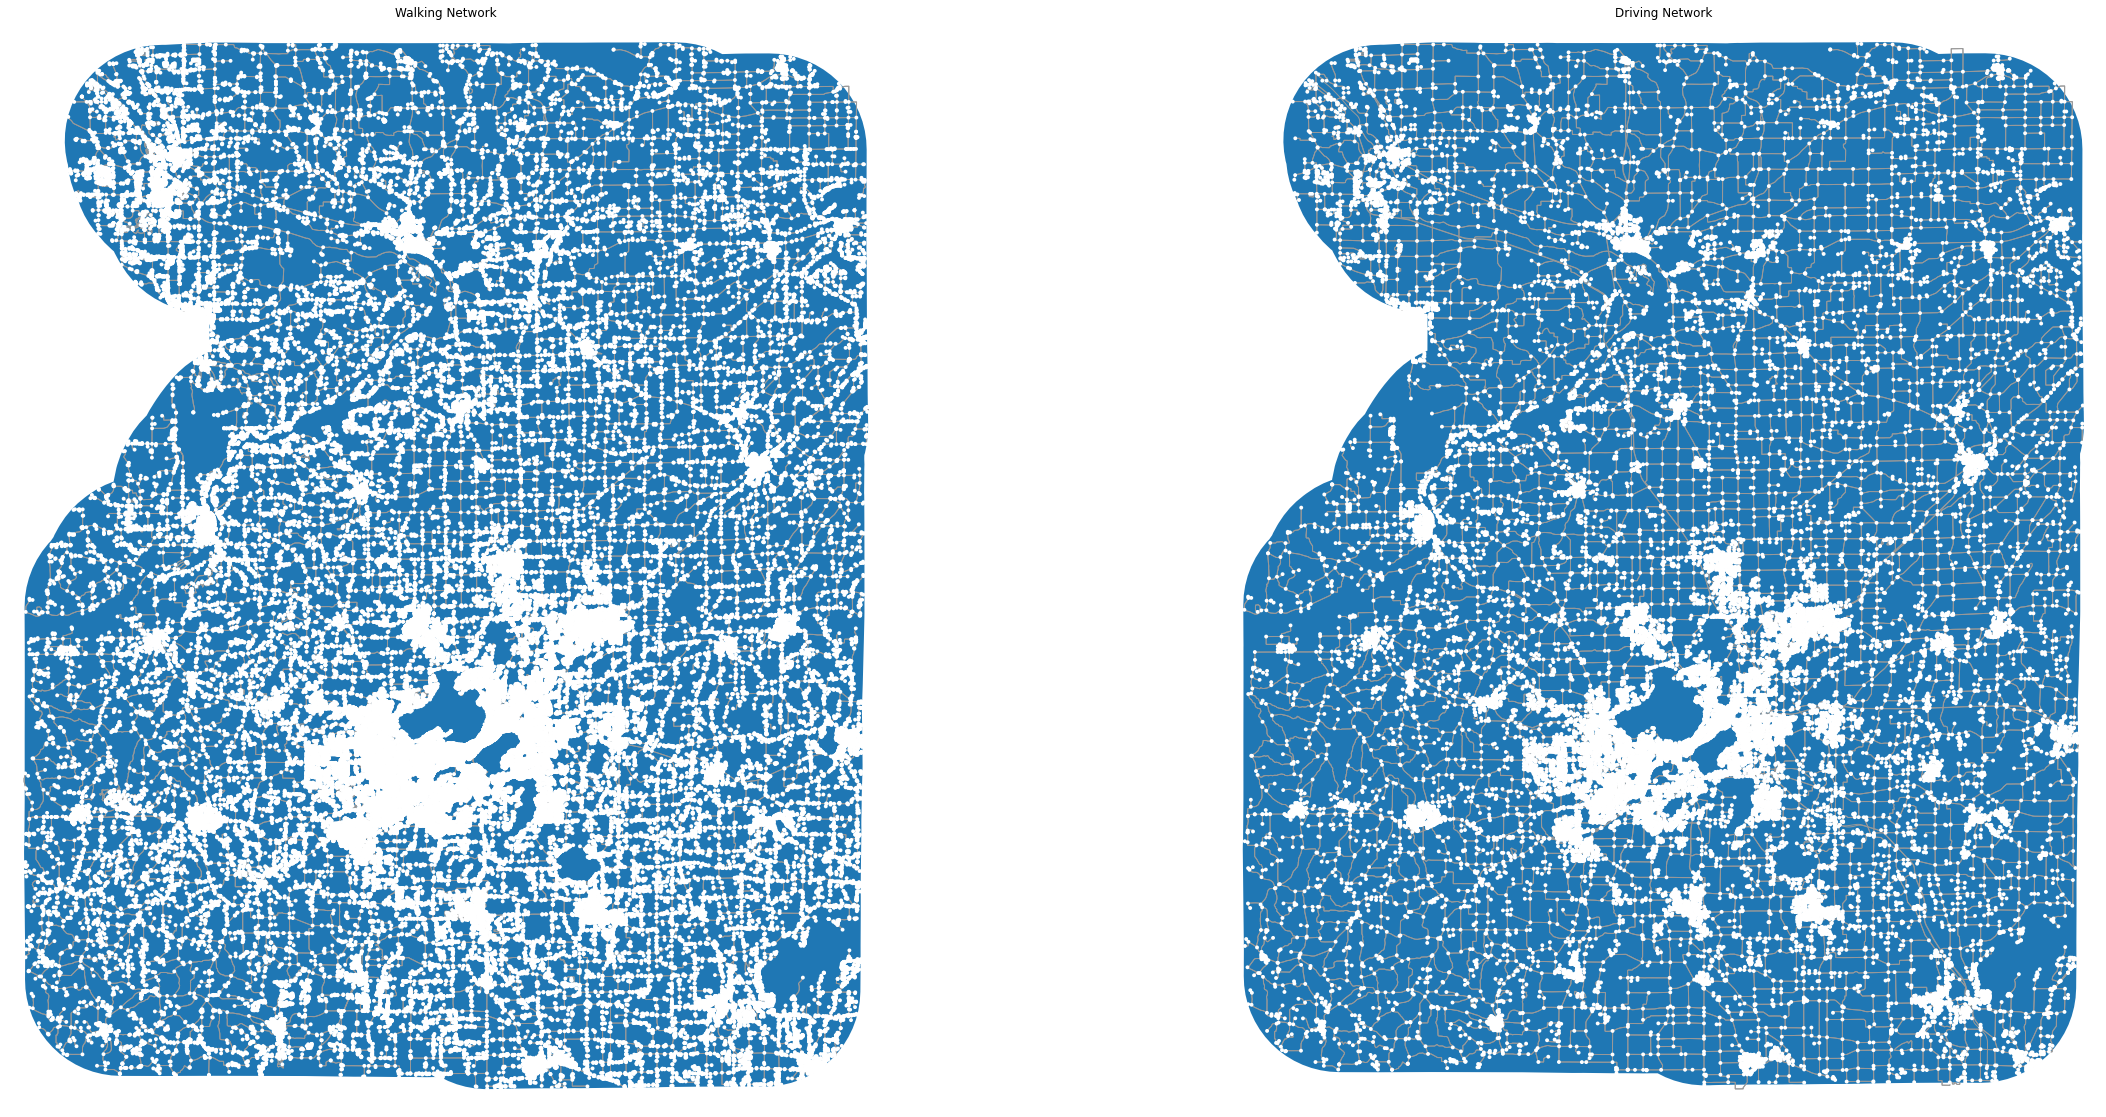

In [13]:
fig, Axes = plt.subplots(figsize=(40,20), ncols=2)

ax1 = buffered_boundary_80.plot(ax=Axes[0])
ax1 = ox.plot_graph(walk_graph_80, ax=ax1, close=False, show=False)[1]
ax1.title.set_text('Walking Network')

ax2 = buffered_boundary_80.plot(ax=Axes[1])
ax2 = ox.plot_graph(drive_graph_80, ax=ax2, close=False, show=False)[1]
ax2.title.set_text('Driving Network')

plt.show()

## 2. Looking at the Distances:

In [17]:
walk_matrix_80 = OD_matrix_80[OD_matrix_80.walk].reset_index(drop=True)

Let's see what is the centroid people walked from the most:

In [24]:
walk_matrix_80.origin_node.value_counts()

5486636538    122
2995259537    111
2986909989    107
2713230449    106
2705034726     88
             ... 
53409164        1
3438032451      1
7831932110      1
2906614954      1
53563182        1
Name: origin_node, Length: 261, dtype: int64

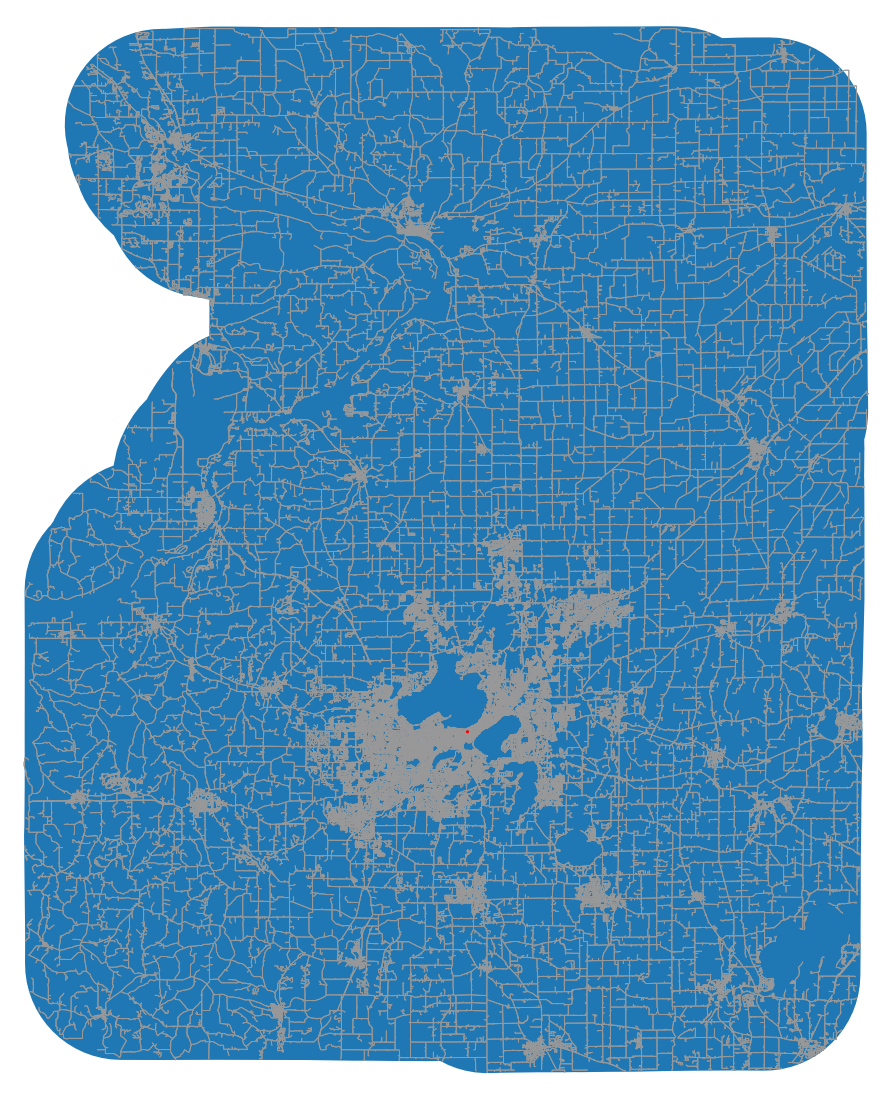

In [38]:
fig, ax = plt.subplots(figsize=(20,20))

ax = buffered_boundary_80.plot(ax=ax)

ns = [15 if int(n)==5486636538 else 0 for n in walk_graph_80.nodes(data=False)]

ax = ox.plot_graph(walk_graph_80, node_color='r', node_size=ns, node_zorder=4, ax=ax)[1]
ax.title.set_text('Most walked node')
plt.show()